In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import files
uploaded = files.upload()


Saving atividade3_dataset (1).csv to atividade3_dataset (1) (2).csv


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [14]:
df = pd.read_csv("/content/atividade3_dataset (1) (2).csv", sep=";")
df.head()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023


In [28]:
print(df.dtypes)

ID               int64
Nome            object
Idade          float64
Cidade          object
Produto         object
Preço           object
Quantidade       int64
Data_Compra     object
dtype: object


In [24]:
df.isnull().sum()

,0
ID,0
Nome,0
Idade,21
Cidade,0
Produto,0
Preço,37
Quantidade,0
Data_Compra,0


In [25]:
df.duplicated().sum()

np.int64(8)

In [26]:
df.drop_duplicates()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023
...,...,...,...,...,...,...,...,...
497,498,Fernanda,41.0,SÃO PAULO,Teclado,1176.08,9,17-02-2024
498,499,Lucas,22.0,PORTO ALEGRE,Teclado,3209.09,5,21-01-2025
499,500,Pedro,46.0,RIO DE JANEIRO,Teclado,3474.99,9,09-08-2024
503,156,João,47.0,belo horizonte,Smartphone,"3444,96",7,28-12-2022


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
nulos_iniciais = df.isnull().sum()
tratamento = {}

In [32]:
# ID: não pode ser nulo -> remover se estiver nulo
df = df.dropna(subset=["ID"])
tratamento["ID"] = "Linhas com ID nulo removidas"

In [33]:
# Nome: substituir nulos por 'Desconhecido'
df["Nome"] = df["Nome"].fillna("Desconhecido")
tratamento["Nome"] = "Preenchido com 'Desconhecido'"


In [34]:
# Idade: preencher com mediana
if df["Idade"].isnull().any():
    df["Idade"] = df["Idade"].fillna(df["Idade"].median())
tratamento["Idade"] = "Preenchido com mediana"

In [35]:
# Cidade: preencher nulos como 'Não Informado'
df["Cidade"] = df["Cidade"].fillna("Não Informado")
tratamento["Cidade"] = "Preenchido com 'Não Informado'"


In [36]:
# Produto: preencher nulos como 'Não Informado'
df["Produto"] = df["Produto"].fillna("Não Informado")
tratamento["Produto"] = "Preenchido com 'Não Informado'"

In [40]:
# Preço: preencher com média
if df["Preço"].isnull().any():
    df["Preço"] = df["Preço"].fillna(df["Preço"].mean())
tratamento["Preço"] = "Preenchido com média"


In [41]:
# Quantidade: preencher com mediana
if df["Quantidade"].isnull().any():
    df["Quantidade"] = df["Quantidade"].fillna(df["Quantidade"].median())
tratamento["Quantidade"] = "Preenchido com mediana"

In [42]:
# Data_Compra: preencher com valor padrão
df["Data_Compra"] = df["Data_Compra"].fillna("01-01-2000")
tratamento["Data_Compra"] = "Preenchido com valor padrão '01-01-2000'"


In [43]:
#Remover duplicadas
df = df.drop_duplicates()

In [44]:
#Mudança para datatime e str
df["Cidade"] = df["Cidade"].str.title()
df["Data_Compra"] = pd.to_datetime(df["Data_Compra"], errors="coerce", dayfirst=True)


/tmp/ipython-input-53433104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cidade"] = df["Cidade"].str.title()
/tmp/ipython-input-53433104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Data_Compra"] = pd.to_datetime(df["Data_Compra"], errors="coerce", dayfirst=True)


In [45]:
estatisticas = df.describe()
correlacao = df.corr(numeric_only=True)

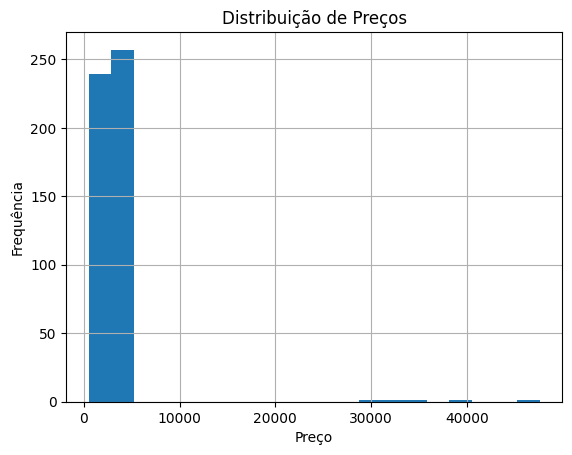

In [46]:
# Gráfico 1: Distribuição de preços
plt.figure()
df["Preço"].hist(bins=20)
plt.title("Distribuição de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

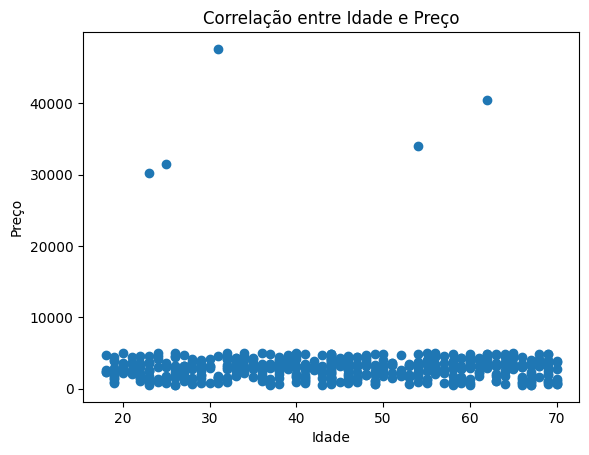

In [47]:
# Gráfico 2: Correlação Idade vs Preço
plt.figure()
plt.scatter(df["Idade"], df["Preço"])
plt.title("Correlação entre Idade e Preço")
plt.xlabel("Idade")
plt.ylabel("Preço")
plt.show()


In [50]:
df.to_csv("base_limpa.csv", index=False)